# Laptop Price Predictor
The goal of this project is to build a supervised machine learning model to predict the price of a laptop based on its features.
The model will be trained with a dataset containing features such as processor type, RAM, storage, etc. and corresponding prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("laptop_data.csv")

In [3]:
#reading top 5 values from a data.
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


this is the dataset about laptop details.

In [4]:
df.shape

(1303, 12)

dataset is contains 1303 rows with 12 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1303 non-null   int64  
 1                       Company  1303 non-null   object 
 2   TypeName                     1303 non-null   object 
 3   Inches                       1303 non-null   float64
 4   ScreenResolution             1303 non-null   object 
 5   Cpu                          1303 non-null   object 
 6   Ram                          1303 non-null   object 
 7   Memory                       1303 non-null   object 
 8   Gpu                          1303 non-null   object 
 9   OpSys                        1303 non-null   object 
 10  Weight                       1303 non-null   object 
 11  Price                        1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

in dataset there is no rows which are identically same.


In [7]:
df.isnull().sum()

Unnamed: 0                     0
                    Company    0
TypeName                       0
Inches                         0
ScreenResolution               0
Cpu                            0
Ram                            0
Memory                         0
Gpu                            0
OpSys                          0
Weight                         0
Price                          0
dtype: int64

dataset contains 0 null value.

In [8]:
#deleting unwanted columns.
df.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


"Unnamed: 0" dosent make any sense in dataset hence unwanted column is deleted. 

In [10]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0                       Company  1303 non-null   object 
 1   TypeName                     1303 non-null   object 
 2   Inches                       1303 non-null   float64
 3   ScreenResolution             1303 non-null   object 
 4   Cpu                          1303 non-null   object 
 5   Ram                          1303 non-null   object 
 6   Memory                       1303 non-null   object 
 7   Gpu                          1303 non-null   object 
 8   OpSys                        1303 non-null   object 
 9   Weight                       1303 non-null   object 
 10  Price                        1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


still dtype of "Weight" and "Ram" is in object.


### *converting dtype*

In [12]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0                       Company  1303 non-null   object 
 1   TypeName                     1303 non-null   object 
 2   Inches                       1303 non-null   float64
 3   ScreenResolution             1303 non-null   object 
 4   Cpu                          1303 non-null   object 
 5   Ram                          1303 non-null   int32  
 6   Memory                       1303 non-null   object 
 7   Gpu                          1303 non-null   object 
 8   OpSys                        1303 non-null   object 
 9   Weight                       1303 non-null   float32
 10  Price                        1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA

<AxesSubplot:xlabel='Price', ylabel='Density'>

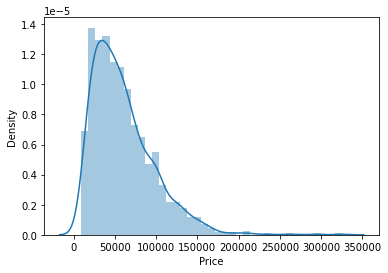

In [14]:
sns.distplot(df["Price"])

distribution is slightly skewed on right.

<AxesSubplot:>

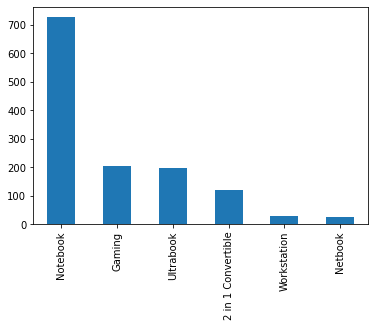

In [15]:
df["TypeName"].value_counts().plot(kind="bar")

netbook type laptop is less sellable cause its specifiacation.

notebook type laptop is highest sellable.


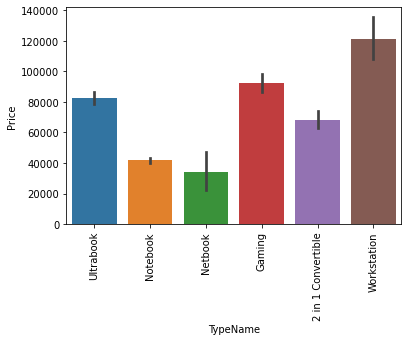

In [16]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

workstation and ultrabooktype type laptops are more expensive and thats why in indian market they have less acceptance.

gaming and ultrabook is have a range of higher middle class but cause of its specificatons is have quite of good acceptance.

notebook type laptops provides customer satisfied range with good functionlaties and specifications thats why they are one of best sellers.

## hence here we can say that type of laptop varies type of a price.

<AxesSubplot:xlabel='Inches', ylabel='Density'>

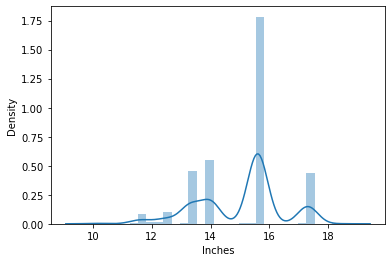

In [17]:
sns.distplot(df["Inches"])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

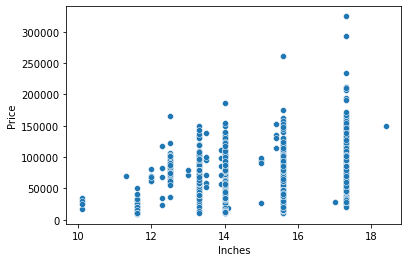

In [18]:
sns.scatterplot(x=df["Inches"],y=df["Price"])

## impact of size on price is not to much dependable but its slightly varies when have big diffrence.

we can see this price diffrence between 10 inches laptop and 16 or 18 inches laptop.

In [19]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

## this kind of very mixed information of a column so we have to do some feature engineering over here.

In [20]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [21]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1000,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.7,67132.800,0
739,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.4,21887.424,0
259,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.0,90522.720,1
763,Asus,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.2,60153.120,0
526,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.2,42570.720,0


here new columm "Touchscreen" is added to the dataset and 1 denotes "yes" and 0 "No".












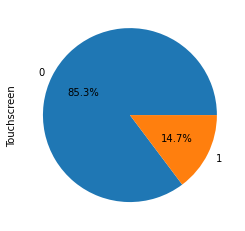

In [22]:
df["Touchscreen"].value_counts().plot(kind="pie",autopct="%0.1F%%")
plt.show()

## touchscreen laptops have capture about 15% of market.

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

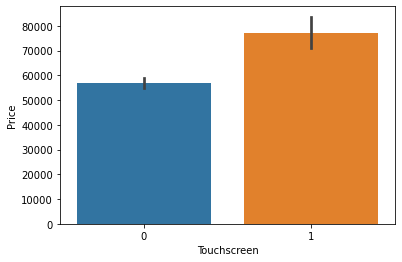

In [23]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

## touchscreen laptops varies with price range.

In [24]:
df["Ips"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)
df["Ips"]

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Ips, Length: 1303, dtype: int64

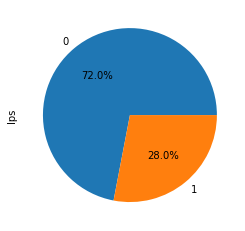

In [25]:
df["Ips"].value_counts().plot(kind="pie",autopct="%0.1F%%")
plt.show()

<AxesSubplot:xlabel='Ips', ylabel='Price'>

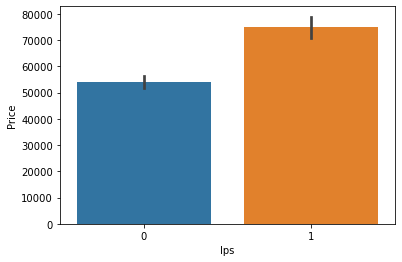

In [26]:
sns.barplot(x=df["Ips"],y=df["Price"])

## IPS Displays laptops having higher range.

In [27]:
new=df["ScreenResolution"].str.split("x",n=1,expand=True)

In [28]:
df["X_res"]=new[0]
df["Y_res"]=new[1]

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


### as we see we found correct y resolution but x resolution we have to do apply some regular expressions.

In [30]:
df["X_res"]=df["X_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0                       Company  1303 non-null   object 
 1   TypeName                     1303 non-null   object 
 2   Inches                       1303 non-null   float64
 3   ScreenResolution             1303 non-null   object 
 4   Cpu                          1303 non-null   object 
 5   Ram                          1303 non-null   int32  
 6   Memory                       1303 non-null   object 
 7   Gpu                          1303 non-null   object 
 8   OpSys                        1303 non-null   object 
 9   Weight                       1303 non-null   float32
 10  Price                        1303 non-null   float64
 11  Touchscreen                  1303 non-null   int64  
 12  Ips                          1303 non-null   int64  
 13  X_res             

In [33]:
df["X_res"]=df["X_res"].astype("int")
df["Y_res"]=df["Y_res"].astype("int")

In [34]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [35]:
df["ppi"]=(((df["X_res"]**2+df["Y_res"]**2))**0.5/df["Inches"]).astype("float")

In [36]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [37]:
df.drop(columns=["ScreenResolution"],inplace=True)

In [38]:
df.drop(columns=["Inches","X_res","Y_res"],inplace=True)

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


## PPI stands for pixels per inches

#### PPI is highly corelated with price.


In [40]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

cpu have 118 diffrent categories and i5,i7 Intel Core are Some of the famous.

In [41]:
df["Cpu Name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [43]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [44]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

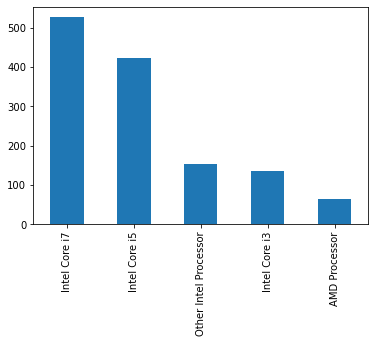

In [46]:
df['Cpu brand'].value_counts().plot(kind='bar')

### intel core i7 generation is most widely used.

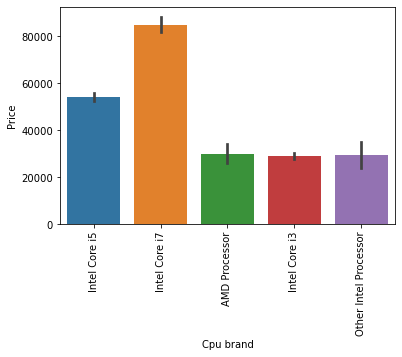

In [47]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### As with huge demand i7 processor is ranging higher price.
#### AMD processor,i3 processor and execpt i5 other intel having same price range.
## we can say that price is varies along with processores.


In [48]:
df.drop(columns=["Cpu","Cpu Name"],inplace=True)

deleting unwanted columns as we have cpu brand for specifications.

In [49]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

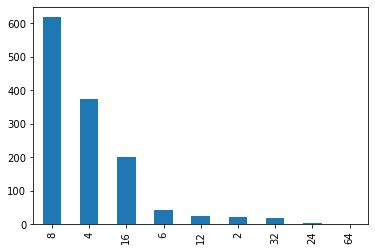

In [50]:
df["Ram"].value_counts().plot(kind="bar")

##### 8gb Ram laptops are standerd size and those are most selling laptops as well.
##### surprisingly 4gb Ram laptops still ahead from 16gb Ram laptops.
##### 64,24,32Gb laptops is vary rare in market. 
##### 2gb laptops are outdated Now.

<AxesSubplot:xlabel='Ram', ylabel='Price'>

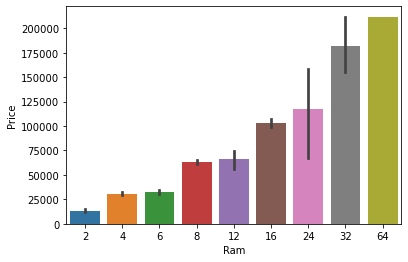

In [51]:
sns.barplot(x=df["Ram"],y=df["Price"])

# highly correlation between Ram and Price.
### even though 12gb ram laptops are in godd price range but still its under rated in market.

In [52]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [53]:
df["Memory"]

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [54]:
df['Memory'] = df['Memory'].astype(str)

In [55]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [56]:
df["Memory"] = df["Memory"].str.replace('GB', '')

In [57]:
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [58]:
new = df["Memory"].str.split(n=1,expand = True)

In [59]:
new

,0,1
0,128,SSD
1,128,Flash Storage
2,256,SSD
3,512,SSD
4,256,SSD
...,...,...
1298,128,SSD
1299,512,SSD
1300,64,Flash Storage
1301,1000,HDD


In [60]:
df["first"]= new[0]

In [61]:
df["first"]=df["first"].str.strip()
#removing unwanted space 

In [62]:
df["first"]

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: object

In [63]:
df['first'].value_counts()

256       508
1000      240
128       177
512       140
500       132
32         45
64         17
2000       16
1.0000     10
16         10
180         5
240         1
8           1
508         1
Name: first, dtype: int64

In [64]:
df["second"]= new[1]

In [65]:
df["second"]=df["second"].str.strip()
df["second"]

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1298              SSD
1299              SSD
1300    Flash Storage
1301              HDD
1302              HDD
Name: second, Length: 1303, dtype: object

In [66]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [67]:
df["Layer1Hybrid"].value_counts()

0    1303
Name: Layer1Hybrid, dtype: int64

In [68]:
df["Layer1HDD"].value_counts()

0    1303
Name: Layer1HDD, dtype: int64

In [69]:
df["Layer1SSD"].value_counts()

0    1303
Name: Layer1SSD, dtype: int64

In [70]:
df["Layer1Flash_Storage"].value_counts()

0    1303
Name: Layer1Flash_Storage, dtype: int64

In [71]:
df["second"].isnull().sum()

0

In [72]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [73]:
df["Layer2HDD"].value_counts()

0    727
1    576
Name: Layer2HDD, dtype: int64

In [74]:
df["Layer2SSD"].value_counts()
#as we see SSD is booming the market.


1    843
0    460
Name: Layer2SSD, dtype: int64

In [75]:
df["Layer2Hybrid"].value_counts()

0    1291
1      12
Name: Layer2Hybrid, dtype: int64

In [76]:
df["Layer2Flash_Storage"].value_counts()

0    1228
1      75
Name: Layer2Flash_Storage, dtype: int64

In [77]:
df["second"]

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1298              SSD
1299              SSD
1300    Flash Storage
1301              HDD
1302              HDD
Name: second, Length: 1303, dtype: object

In [78]:
df['first'] = df['first'].str.replace(r'\D', '')
df['second'] = df['first'].str.replace(r'\D', '')

In [79]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [80]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [81]:
df["second"] 

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: second, Length: 1303, dtype: int32

In [82]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
1131,Lenovo,2 in 1 Convertible,8,512 SSD,Nvidia Quadro M500M,Windows 7,1.80,109244.2464,1,1,...,0,0,0,1,0,0,0,512,0,0
1195,HP,Notebook,12,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.5600,0,1,...,0,0,1,1,0,0,128,128,0,0
850,HP,Notebook,4,128 SSD,Intel HD Graphics 400,No OS,1.86,15930.7200,0,0,...,0,0,0,1,0,0,0,128,0,0
1204,Asus,Gaming,8,1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,62284.3200,0,0,...,0,0,1,0,0,0,1000,0,0,0
241,Asus,Notebook,8,128 SSD + 1000 HDD,Nvidia GeForce 150MX,Windows 10,2.10,61005.6000,0,0,...,0,0,1,1,0,0,128,128,0,0


In [83]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [84]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


as we have functions of meomery so there no use of memory column.

In [85]:
df.drop(columns=["Memory"],inplace=True)

In [86]:
df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.265334
SSD              0.676202
Hybrid          -0.037971
Flash_Storage   -0.040511
Name: Price, dtype: float64

#### SSD and HDD are still have huge market capture but HDD is negatively co-related to price.
#### hybrid and flash_storage is still low market capture as with negative co-relation so we deleting this column.


In [87]:

df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

#### GPU (graphical processing unit)
##### it shows which graphic card is having in laptop.

In [88]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [89]:
df["Gpu brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [90]:
df["Gpu brand"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1303, dtype: object

##### here gpu column contains lots of mixed info hence we are going for only GPU brands.

In [91]:
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

<AxesSubplot:xlabel='Gpu brand', ylabel='Price'>

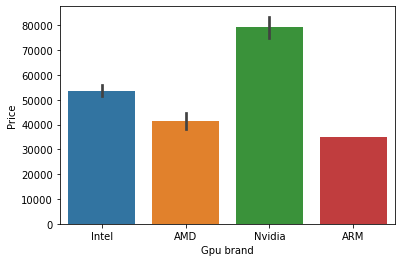

In [92]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])

#### Nvidia is expensive grahic cards and its mostly used for gaming laptops.
#### in reacent days intel introduce new graphic cards which are quite expensive thats its surpasses AMD.

In [93]:
df.drop(columns=["Gpu"],inplace=True)

### Opsys(opreating system)

In [94]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

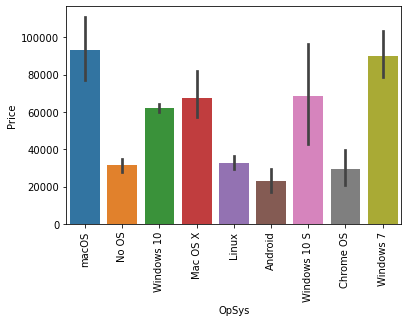

In [95]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

since we have too much categories now in os hence we club into a groups.

In [96]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [97]:
df['os'] = df['OpSys'].apply(cat_os)

In [98]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [99]:
df.drop(columns=['OpSys'],inplace=True)

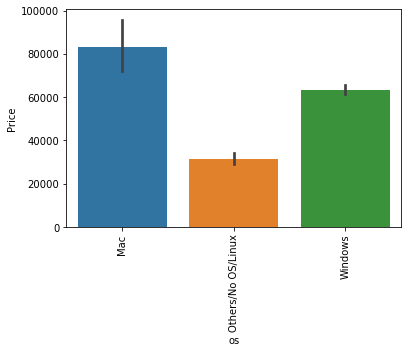

In [100]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Mac opereating systems are one of expensive ones.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

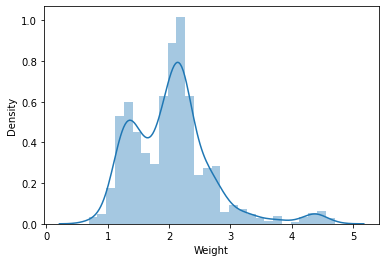

In [101]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

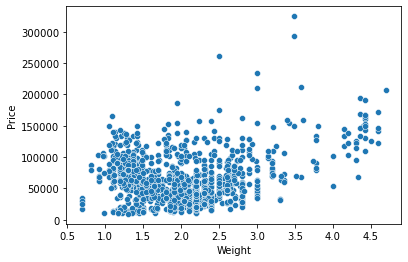

In [102]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

distriburion is slightly linear.

In [103]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.265334
SSD            0.676202
Name: Price, dtype: float64

<AxesSubplot:>

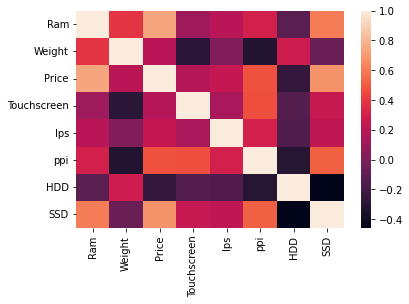

In [104]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

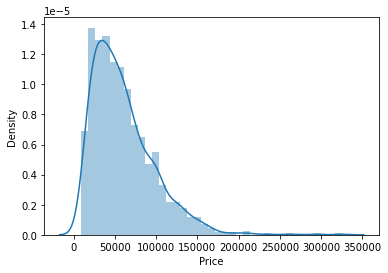

In [105]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

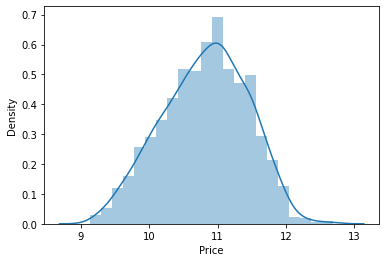

In [106]:
sns.distplot(np.log(df['Price']))

In [107]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [108]:
X
#this are independent variables which 12 columns.

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [109]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

### Train-test-split

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=123)

In [111]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
69,Asus,Gaming,12,3.00,0,0,127.335675,Intel Core i7,1000,0,Nvidia,Others/No OS/Linux
1278,Dell,Notebook,2,2.20,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
478,Dell,Notebook,8,2.20,0,0,141.211998,Intel Core i5,1000,0,AMD,Windows
184,Xiaomi,Notebook,8,1.95,0,1,141.211998,Intel Core i5,0,256,Nvidia,Others/No OS/Linux
922,HP,Ultrabook,8,1.39,1,0,276.053530,Intel Core i7,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1238,MSI,Gaming,8,2.30,0,0,141.211998,Intel Core i7,128,128,Nvidia,Windows
1147,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
106,Lenovo,Notebook,4,1.85,0,0,141.211998,Intel Core i3,1000,0,Intel,Windows
1041,Vero,Notebook,2,1.45,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [113]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


In [114]:
import sys
!{sys.executable} -m pip install xgboost

In [115]:
from xgboost import XGBRegressor


# Linear Regression

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8526942961347345
MAE 0.20451400133765849
RMSE 0.4522322427002065
MSE 0.06614340286466705


### hyper parameter Tunning

#### Ridge Regression

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8477234251713202
MAE 0.20879528428859762
RMSE 0.45694122629567757
MSE 0.06837542994911802


#### Lasso Regression

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8490794469515935
MAE 0.20801757576114926
RMSE 0.4560894383354533
MSE 0.06776654724768559


In [120]:
#from sklearn.model_selection import RandomizedSearchCV

# Desicion Tree

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=9)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8491369628700349
MAE 0.2041438330221124
RMSE 0.4518227894010133
MSE 0.06774072137356954


# SVM

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8709402451484215
MAE 0.18705531989779597
RMSE 0.43249892473599977
MSE 0.05795058259638787


# Ada Boost 

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8095212473912553
MAE 0.23759190791159812
RMSE 0.4874340036472611
MSE 0.08552902257256212


# Gradient Boost

In [124]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.909658369694116
MAE 0.1468342963148745
RMSE 0.38318963492620006
MSE 0.04056531887073735


In [128]:
report ={"Regression Algorithms": ["LinearRegression","Ridge Regression"," lasso Regression","Decision Tree Regressor","SVM","AdaBoostRegressor","GradientBoostingRegressor"],
      "R2 Score": [0.852,0.847,0.849,0.813,0.870,0.805,0.909],"MAE":[0.204,0.208,0.208,0.214,0.187,0.242,0.147],"RMSE":[0.452,0.456,0.456,0.438,0.463,0.491,0.383],"MSE":[0.066,0.068,0.067,0.083,0.057,0.087,0.040]}

In [129]:
report=pd.DataFrame(report)

In [130]:
report

,Regression Algorithms,R2 Score,MAE,RMSE,MSE
0,LinearRegression,0.852,0.204,0.452,0.066
1,Ridge Regression,0.847,0.208,0.456,0.068
2,lasso Regression,0.849,0.208,0.456,0.067
3,Decision Tree Regressor,0.813,0.214,0.438,0.083
4,SVM,0.870,0.187,0.463,0.057
5,AdaBoostRegressor,0.805,0.242,0.491,0.087
6,GradientBoostingRegressor,0.909,0.147,0.383,0.040


## Gradient Boost  are best regression model for this dataset.